# Predicting health care workers for 2020 for different countries (per 10,000 population)

In [ ]:
#Loading relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [919]:
#loading the data
doctor=pd.read_excel("Health_workers_source_data.xlsx")

In [1117]:
#viewing a section of the dataframe
doctor.head()

,Country,Year,Medical doctors (per 10 000 population),Nursing and midwifery personnel (per 10 000 population),Dentists (per 10 000 population),Pharmacists (per 10 000 population)
0,Afghanistan,2017,NaN,1.755,NaN,NaN
1,Afghanistan,2016,2.782,1.482,0.034,0.473
2,Afghanistan,2015,2.850,1.299,0.036,0.497
3,Afghanistan,2014,2.983,1.476,0.033,0.513
4,Afghanistan,2013,2.846,2.495,NaN,NaN


In [921]:
#Renaming the data frame columns to make them short
doctor_new=(doctor
 .rename(columns={"Medical doctors (per 10 000 population)":"medical_doctor", 
                "Nursing and midwifery personnel (per 10 000 population)":"nurse_midwife",
                "Dentists (per 10 000 population)":"dentist",
                "Pharmacists (per 10 000 population)":"pharmacist"}))

#### First method (less robust): Following code calculates 2020 health workers but removes all the missing data from all columns, which leads to removal of information from some countries which might have some kind of health workers for 2020 but not the other kinds of heath workers

In [1124]:
#creating a new predict_years variable with value 2020
predict_years= [2020]

#creating an emplty dataframe which will hold the predictions
df_doctor=pd.DataFrame(columns=["Country","Year"])

#creating copy of doctor_new dataframe and dropping NAs
doctor_new_1=doctor_new.copy()
doctor_new_1= (doctor_new_1
              .dropna())

#adding the country and years column to df_doctor dataframe
for i in range(len(doctor_new_1["Country"].unique())):
    for j in range(len(predict_years)):
        df_doctor=df_doctor.append(pd.DataFrame([{"Country":doctor_new_1["Country"].unique()[i], "Year":predict_years[j]}]),
                                   ignore_index=True)
        
#Running the linear regression, and adding the predicted values as a new column in the df_doctore dataframe
for i in range(len(doctor_new_1.columns)-2):
    doctor_sub=pd.DataFrame(doctor_new_1.set_index(["Country", "Year"]).iloc[:, i]).reset_index()
    predicted_value=[]
    for j in range(len(doctor_sub["Country"].unique())):
        doctor_sub_country=(doctor_sub[doctor_sub["Country"]==doctor_sub["Country"].unique()[j]]
         .dropna())
        #running the regression, and reshaping the data and converting into array to input in the model
        linreg=LinearRegression().fit(np.array(doctor_sub_country["Year"]).reshape(-1, 1),
                              np.array(doctor_sub_country[doctor_sub_country.columns[2]]).reshape(-1, 1))
        X_test=np.array(predict_years).reshape(-1,1) #creating an array which holds the predict_years value of 2020
        lin_pred_array=linreg.predict(X_test) #predicting the health workers for 2020
        lin_pred_list=[]
        for k in range(len(lin_pred_array)):
            lin_pred_list.append((lin_pred_array)[k][0])
        predicted_value.extend(lin_pred_list)
    df_doctor[doctor_sub_country.columns[2]]=predicted_value

#Saving the output onto disc
df_doctor.to_excel("df_doctor.xlsx")

### Second more robust method: Creating four dataframes each havnig prediction for different categories of health workers for 2020

In [ ]:
#creating predict_years variable which will be added as the column in the data frames
predict_years= [2020]
#Creating emplty dictionary whcih will hold the four dataframes of the output.
#These dataframes can then be extracted individually
df_dict={}

#
for i in range(len(doctor_new.columns)-2):
    df_doctor=pd.DataFrame(columns=["Country","Year"])
    doctor_sub=(pd.DataFrame(doctor_new.set_index(["Country", "Year"]).iloc[:, i]).reset_index()
                .dropna())
    predicted_value=[]
    country_name=[]
    year_name=[]
    for j in range(len(doctor_sub["Country"].unique())):
        doctor_sub_country=doctor_sub[doctor_sub["Country"]==doctor_sub["Country"].unique()[j]]
        #fitting the linear regression
        linreg=LinearRegression().fit(np.array(doctor_sub_country["Year"]).reshape(-1, 1),
                              np.array(doctor_sub_country[doctor_sub_country.columns[2]]).reshape(-1, 1))
        X_test=np.array(predict_years).reshape(-1,1)
        lin_pred_array=linreg.predict(X_test) #predicting the health worker
        lin_pred_list=[]
        for k in range(len(lin_pred_array)):
            lin_pred_list.append((lin_pred_array)[k][0])
        predicted_value.extend(lin_pred_list)
        country_name.append(doctor_sub["Country"].unique()[j])
        year_name.append("2020")
    df_doctor["Country"]= country_name
    df_doctor["Year"]=year_name
    df_doctor[doctor_sub_country.columns[2]]=predicted_value
    df_dict[i]=df_doctor

#Extracting the four data frames from the dictionary
df_doctor_medical=df_dict[0]
df_doctor_nurse=df_dict[1]
df_doctor_denstist=df_dict[2]
df_doctor_pharmacist=df_dict[3]

#Setting the "country" as index for all the data frames
#This is import as this will be used in creating a consolidated dataframe of all the four health care workers predictions
df_doctor_medical=df_doctor_medical.set_index("Country")
df_doctor_nurse=df_doctor_nurse.set_index("Country")
df_doctor_denstist=df_doctor_denstist.set_index("Country")
df_doctor_pharmacist=df_doctor_pharmacist.set_index("Country")

Importing the excel with countries for which we need a projections.


In [929]:
#loading data
included_countries= pd.read_excel("included_countries.xlsx")

In [998]:
#creating a empty dataframe which will hold the projections of different health workers in 2020
df_doctor_final=pd.DataFrame(columns=["Country","Year", "medical_doctor", "nurse_midwife", "dentist", "pharmacist"])

#setting the countries and year to the values that we want
df_doctor_final["Country"]=included_countries["Country_Name"]
df_doctor_final["Year"]="2020"

#Setting "country" as the index
df_doctor_final=df_doctor_final.set_index("Country")

Consolidating all the four dataframes: df_doctor_medical, df_doctor_nurse, df_doctor_denstist, and df_doctor_pharmacist into one df_doctor_final dataframe

In [1063]:
#Running loop to consolidate the dataframes
for i in range(len(df_doctor_final.index)):
    if ((df_doctor_final.index.isin(df_doctor_medical.index))[i]==True):
        df_doctor_final.loc[df_doctor_final.index[i], "medical_doctor"]=df_doctor_medical.loc[df_doctor_final.index[i], "medical_doctor"]
    if ((df_doctor_final.index.isin(df_doctor_nurse.index))[i]==True):
        df_doctor_final.loc[df_doctor_final.index[i], "nurse_midwife"]=df_doctor_nurse.loc[df_doctor_final.index[i], "nurse_midwife"]
    if ((df_doctor_final.index.isin(df_doctor_denstist.index))[i]==True):
        df_doctor_final.loc[df_doctor_final.index[i], "dentist"]=df_doctor_denstist.loc[df_doctor_final.index[i], "dentist"]
    if ((df_doctor_final.index.isin(df_doctor_pharmacist.index))[i]==True):
        df_doctor_final.loc[df_doctor_final.index[i], "pharmacist"]=df_doctor_pharmacist.loc[df_doctor_final.index[i], "pharmacist"]

#Replaning NA's in the final dataframe with "Missing data"
df_doctor_final=df_doctor_final.replace(np.nan, "Missing data", regex=True)

#Saving the final dataframe on to disc
df_doctor_final.to_excel("df_doctor_final.xlsx")

#### Regression plots of Medical professional's for 15 countries 

Note for  Angola, Bahamas, Antigua and Barbuda there are very few points for a confident  regression line to be created. But, the algorithim still tries to plot a line. One should recheck these countries with very sparse data to use methods other than linear regression for prediction. 

Similar plots can be created for the remaining countries to check for data sparsity.

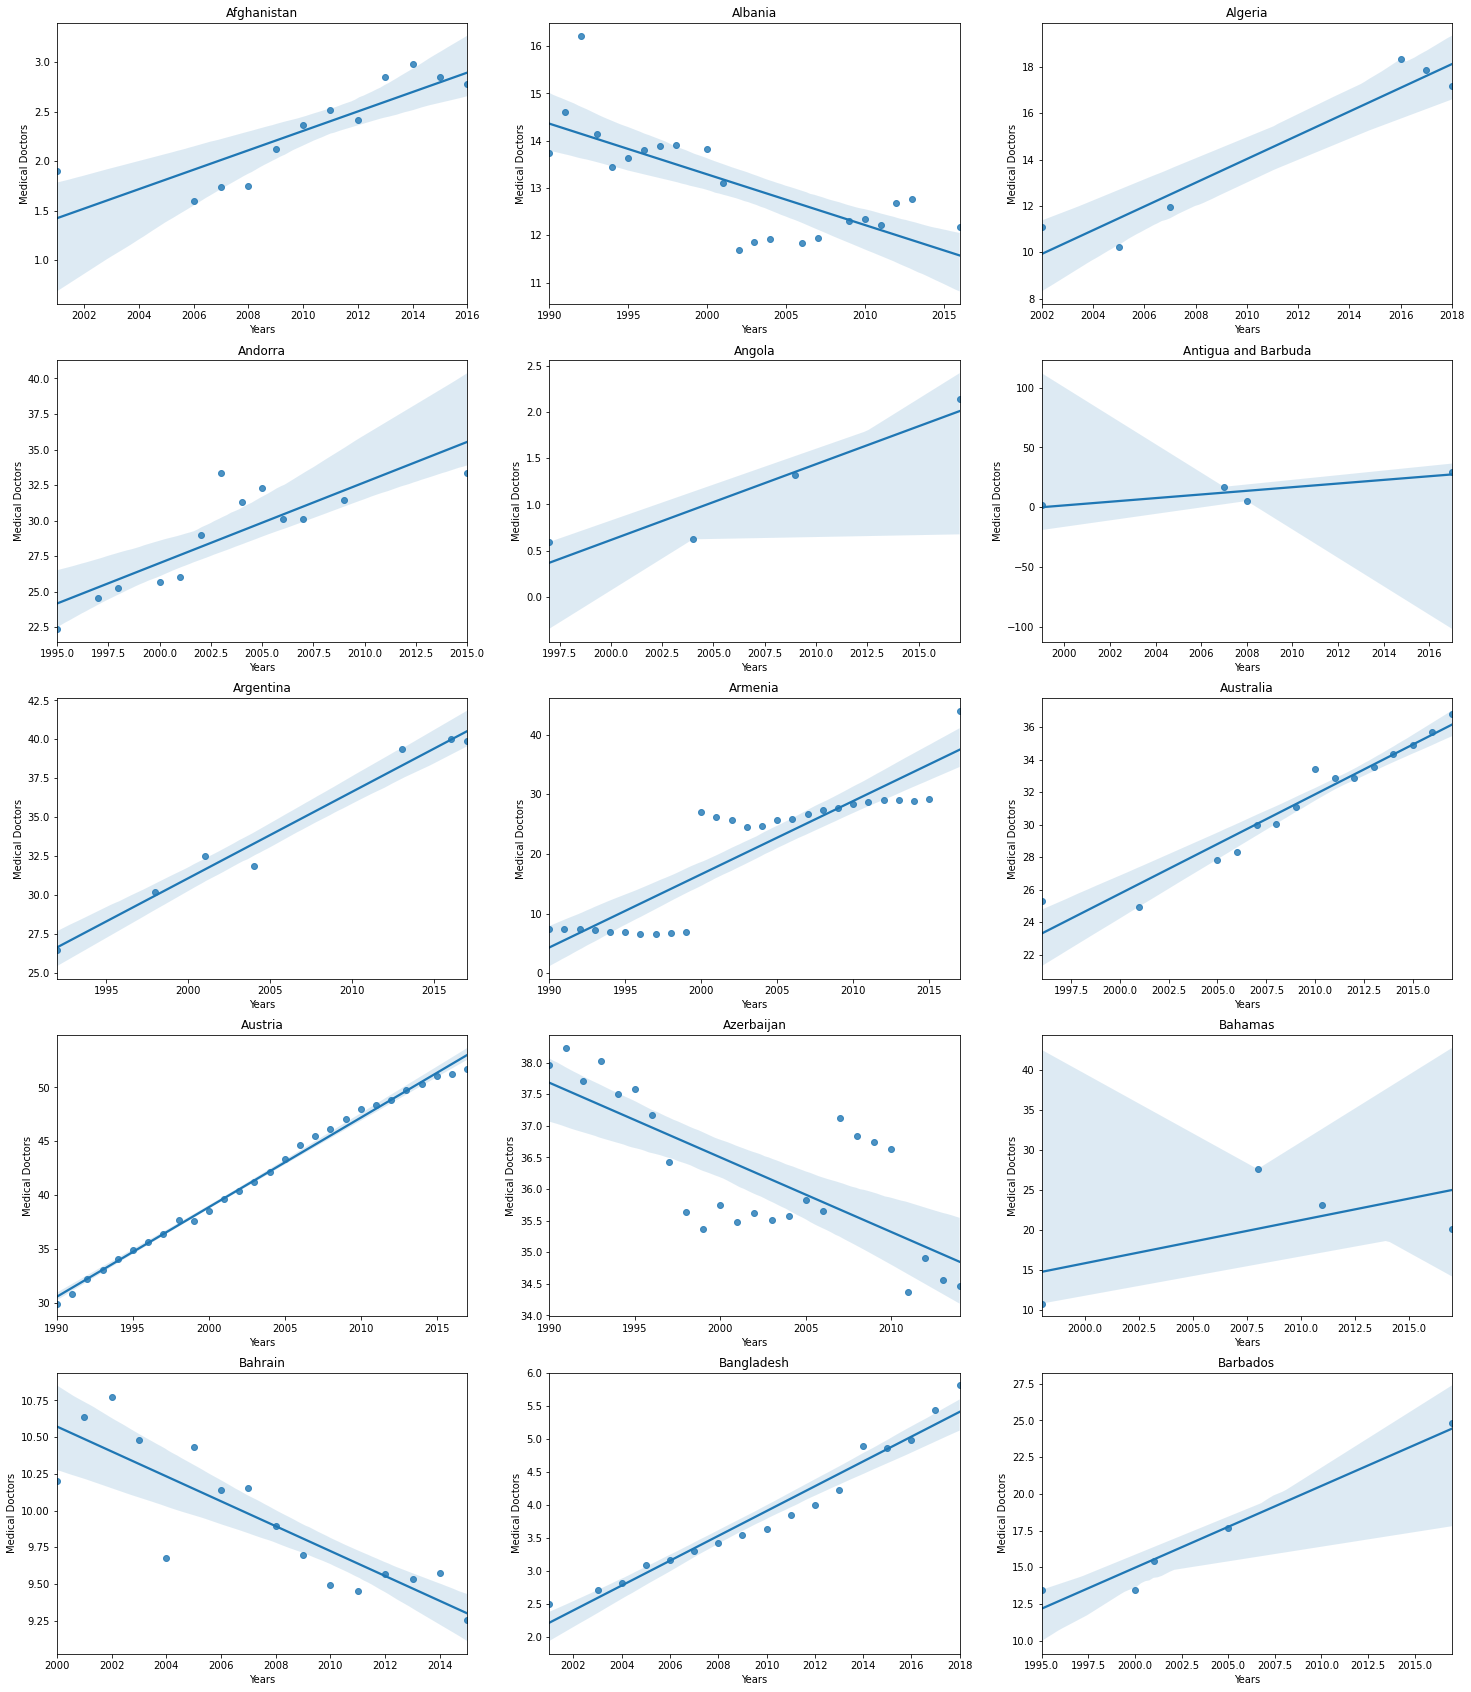

In [1213]:
fig, subaxes= plt.subplots(5,3, figsize=(25,30))

for ax, K in zip(subaxes.flatten(), [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]):
    sns.regplot(x=doctor_new.iloc[:,0:3][doctor_new.iloc[:,0:3]["Country"]==doctor_new["Country"].unique()[K]]["Year"], 
                y=doctor_new.iloc[:,0:3][doctor_new.iloc[:,0:3]["Country"]==doctor_new["Country"].unique()[K]][doctor_new.iloc[:,0:3][doctor_new.iloc[:,0:3]["Country"]==doctor_new["Country"].unique()[K]].columns[2]],
               ax=ax)
    ax.set_xlabel('Years')
    ax.set_ylabel('Medical Doctors')
    ax.set_title(doctor_new["Country"].unique()[K])


#### Regression plots of Nurse and midwifery professional's for 15 countries 

Note the plots for Algeria, Bahamas, and Argentina here show high variance. Similar plots for other countries can be created to check for data sparsity and to see whether linaer regression makes sense for predition or some other mehtod needs to be employed.

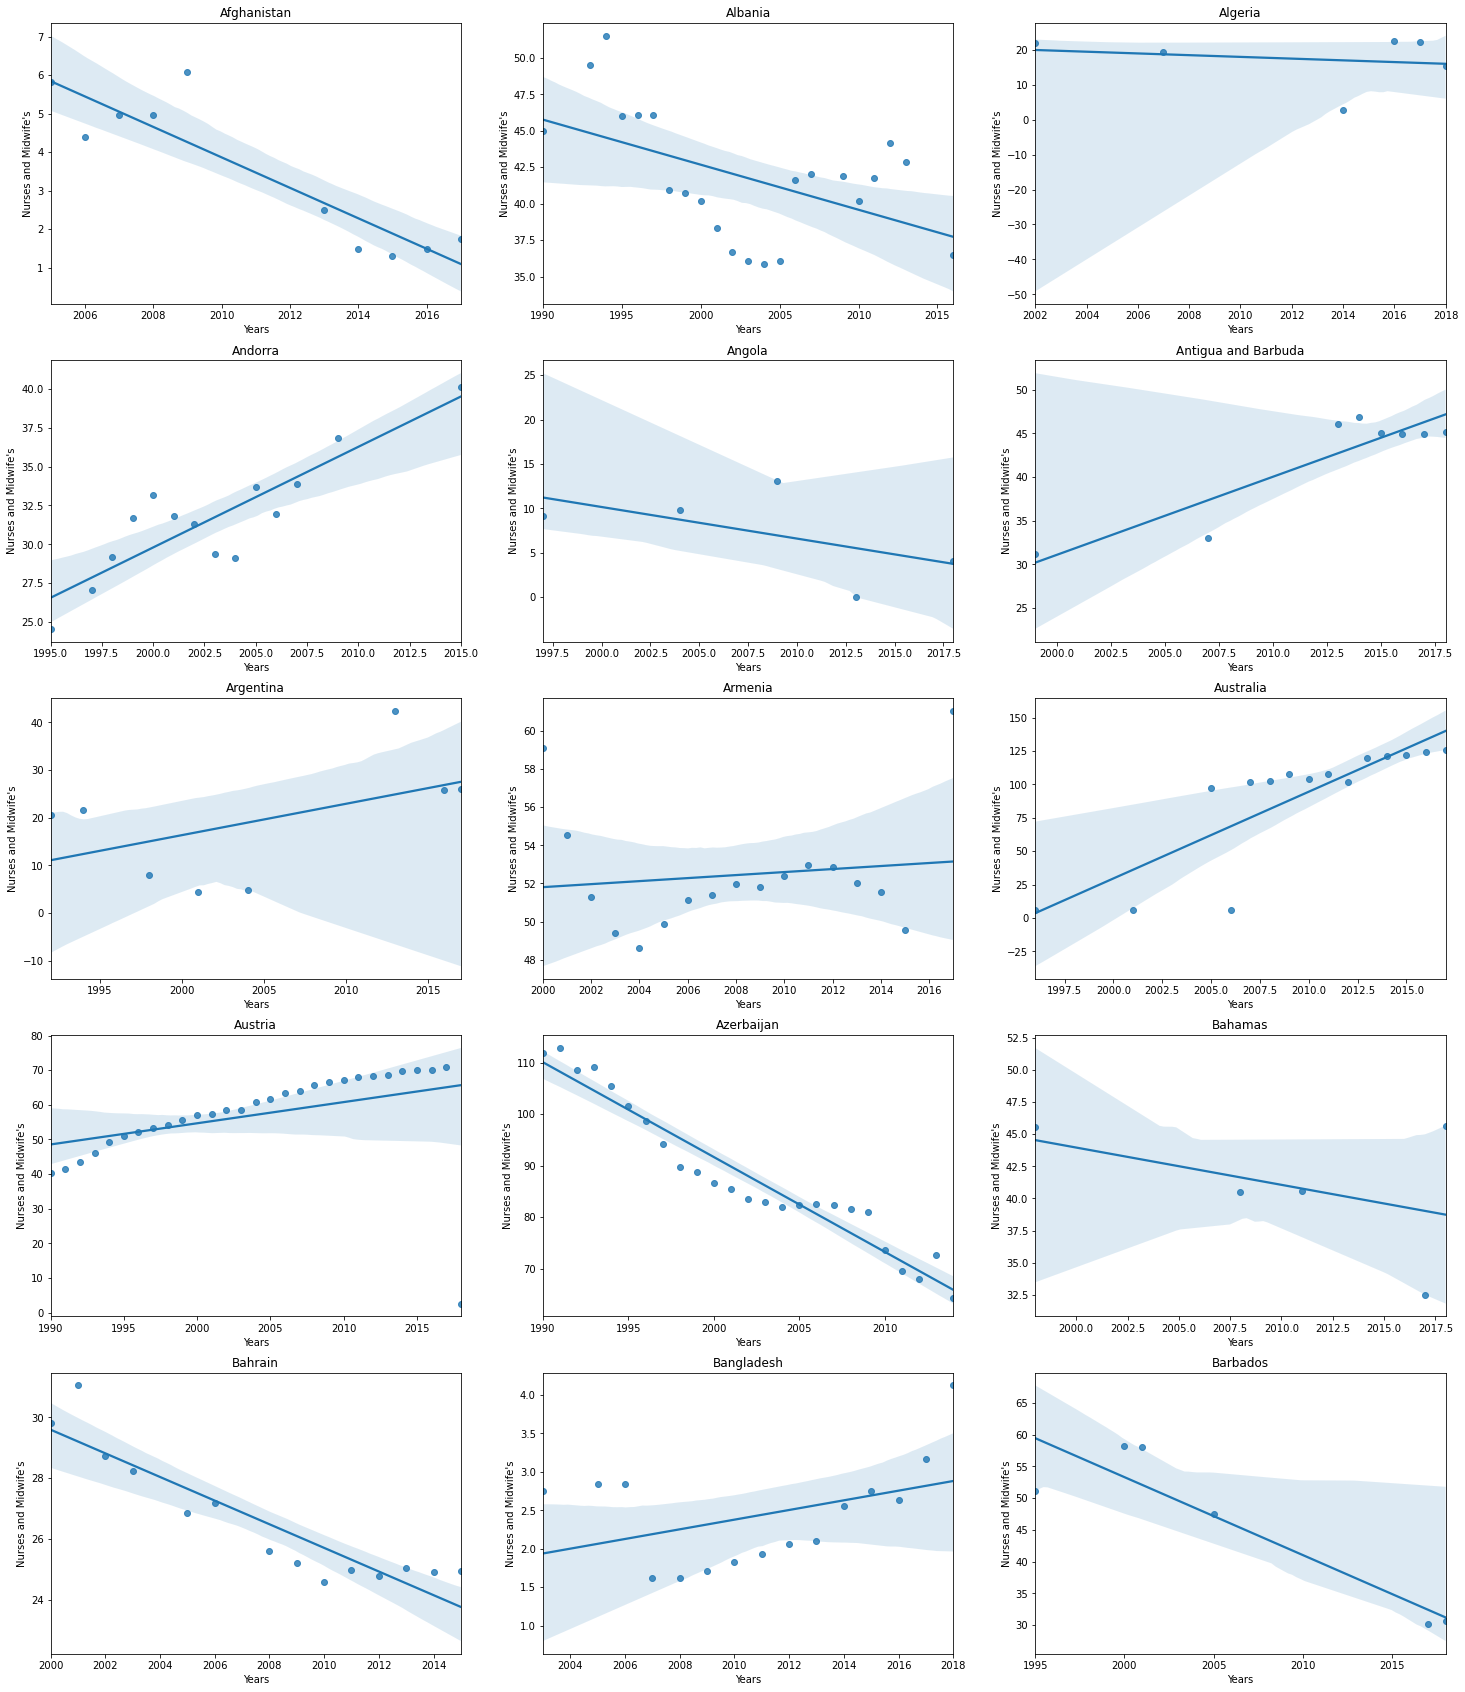

In [1225]:
fig, subaxes= plt.subplots(5,3, figsize=(25,30))

for ax, K in zip(subaxes.flatten(), [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]):
    sns.regplot(x=doctor_new.iloc[:,0:4][doctor_new.iloc[:,0:4]["Country"]==doctor_new["Country"].unique()[K]]["Year"], 
                y=doctor_new.iloc[:,0:4][doctor_new.iloc[:,0:4]["Country"]==doctor_new["Country"].unique()[K]][doctor_new.iloc[:,0:4][doctor_new.iloc[:,0:4]["Country"]==doctor_new["Country"].unique()[K]].columns[3]],
               ax=ax)
    ax.set_xlabel('Years')
    ax.set_ylabel("Nurses and Midwife's")
    ax.set_title(doctor_new["Country"].unique()[K])


#### Regression plots of  Dentist's for 15 countries 

Note data sparsity for Algeria, Angola, Antigua.

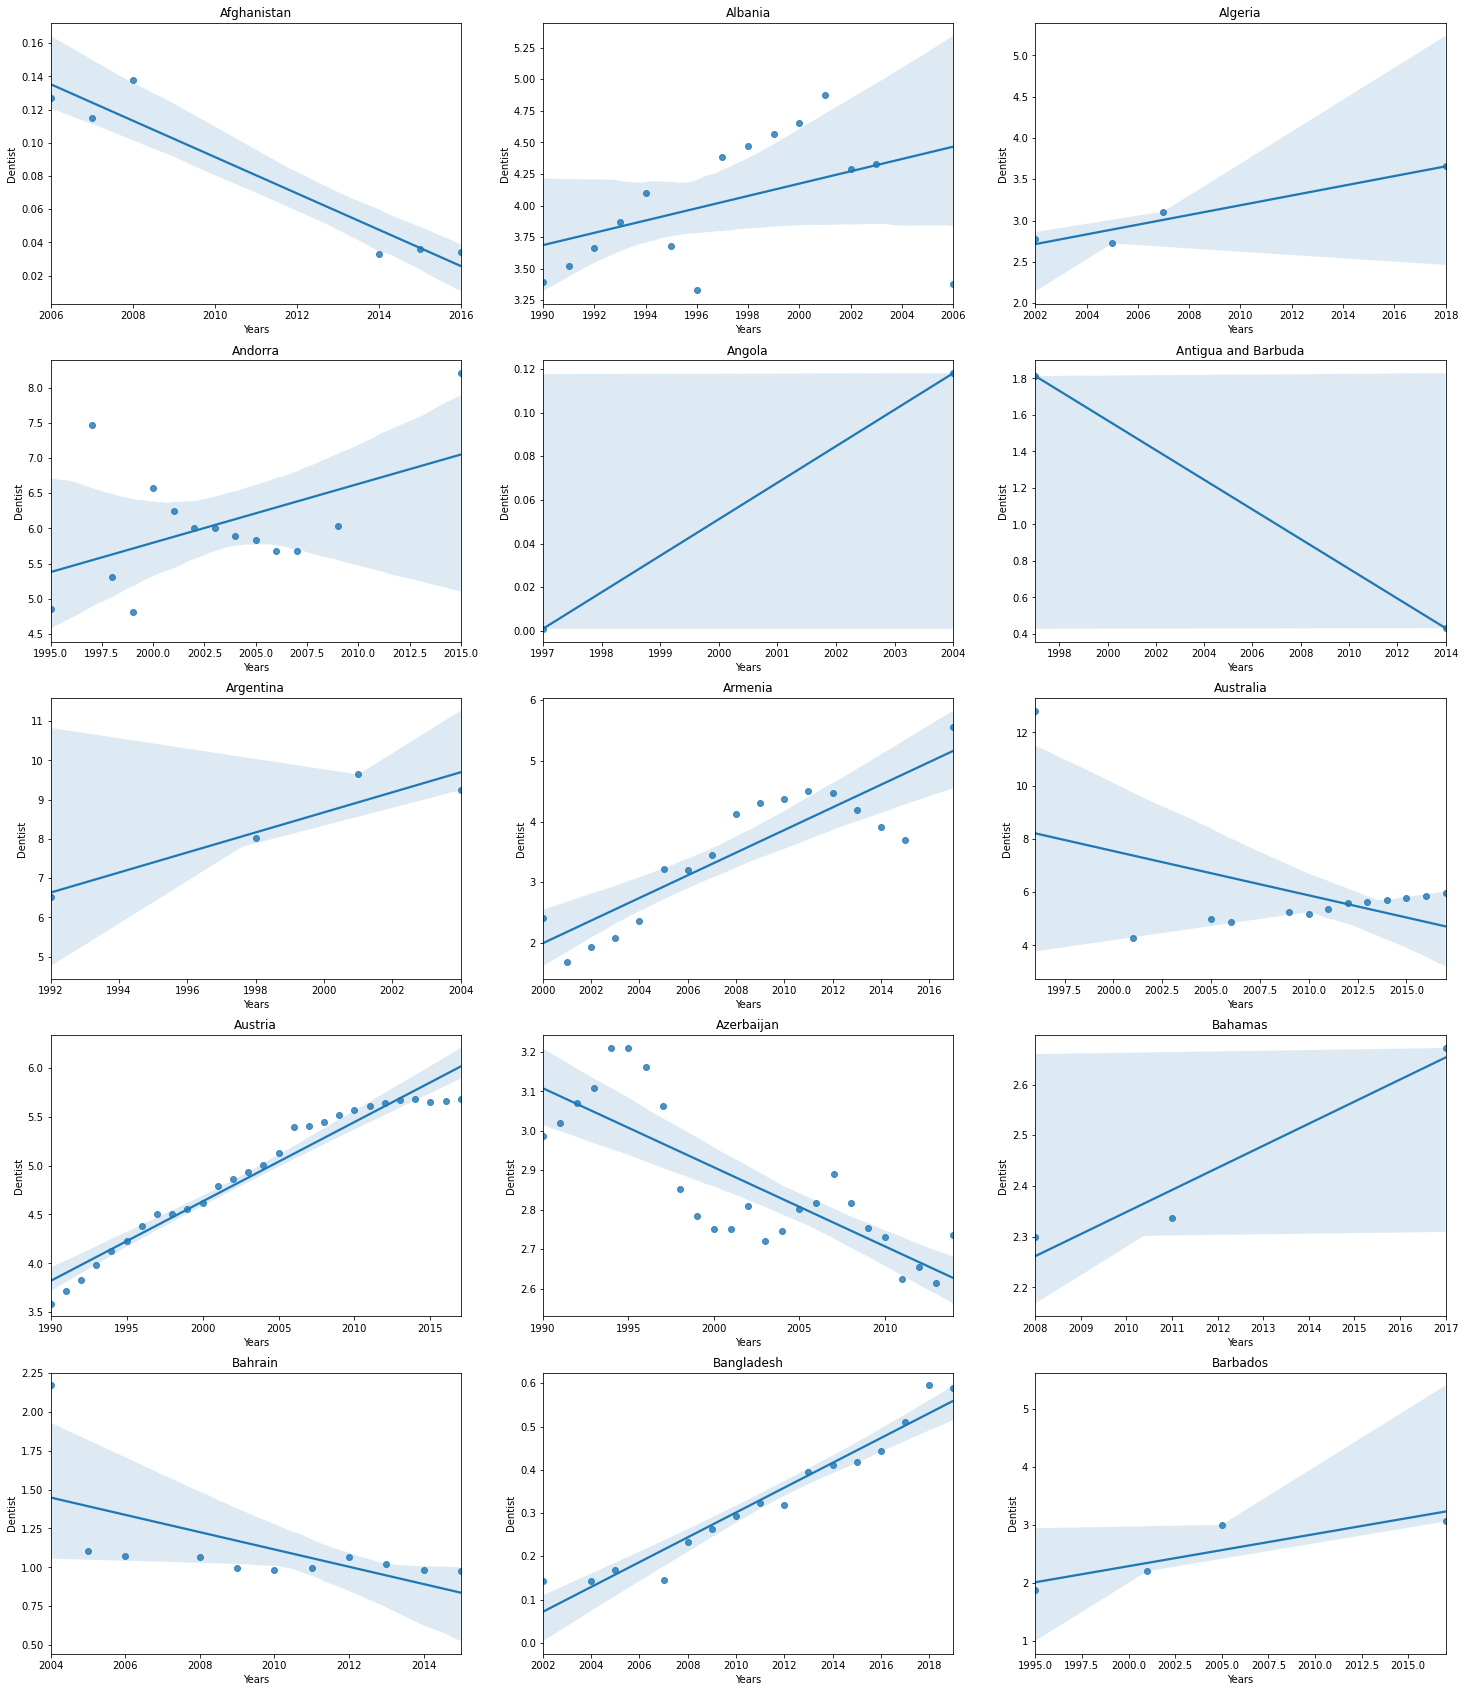

In [1229]:
fig, subaxes= plt.subplots(5,3, figsize=(25,30))

for ax, K in zip(subaxes.flatten(), [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]):
    sns.regplot(x=doctor_new.iloc[:,0:5][doctor_new.iloc[:,0:5]["Country"]==doctor_new["Country"].unique()[K]]["Year"], 
                y=doctor_new.iloc[:,0:5][doctor_new.iloc[:,0:5]["Country"]==doctor_new["Country"].unique()[K]][doctor_new.iloc[:,0:5][doctor_new.iloc[:,0:5]["Country"]==doctor_new["Country"].unique()[K]].columns[4]],
               ax=ax)
    ax.set_xlabel('Years')
    ax.set_ylabel("Dentist")
    ax.set_title(doctor_new["Country"].unique()[K])

#### Regression plots of  Pharmacists's for 15 countries 

Note data sparsity for Angola, Antigua, Argentina, Bahamas, and Barbados.

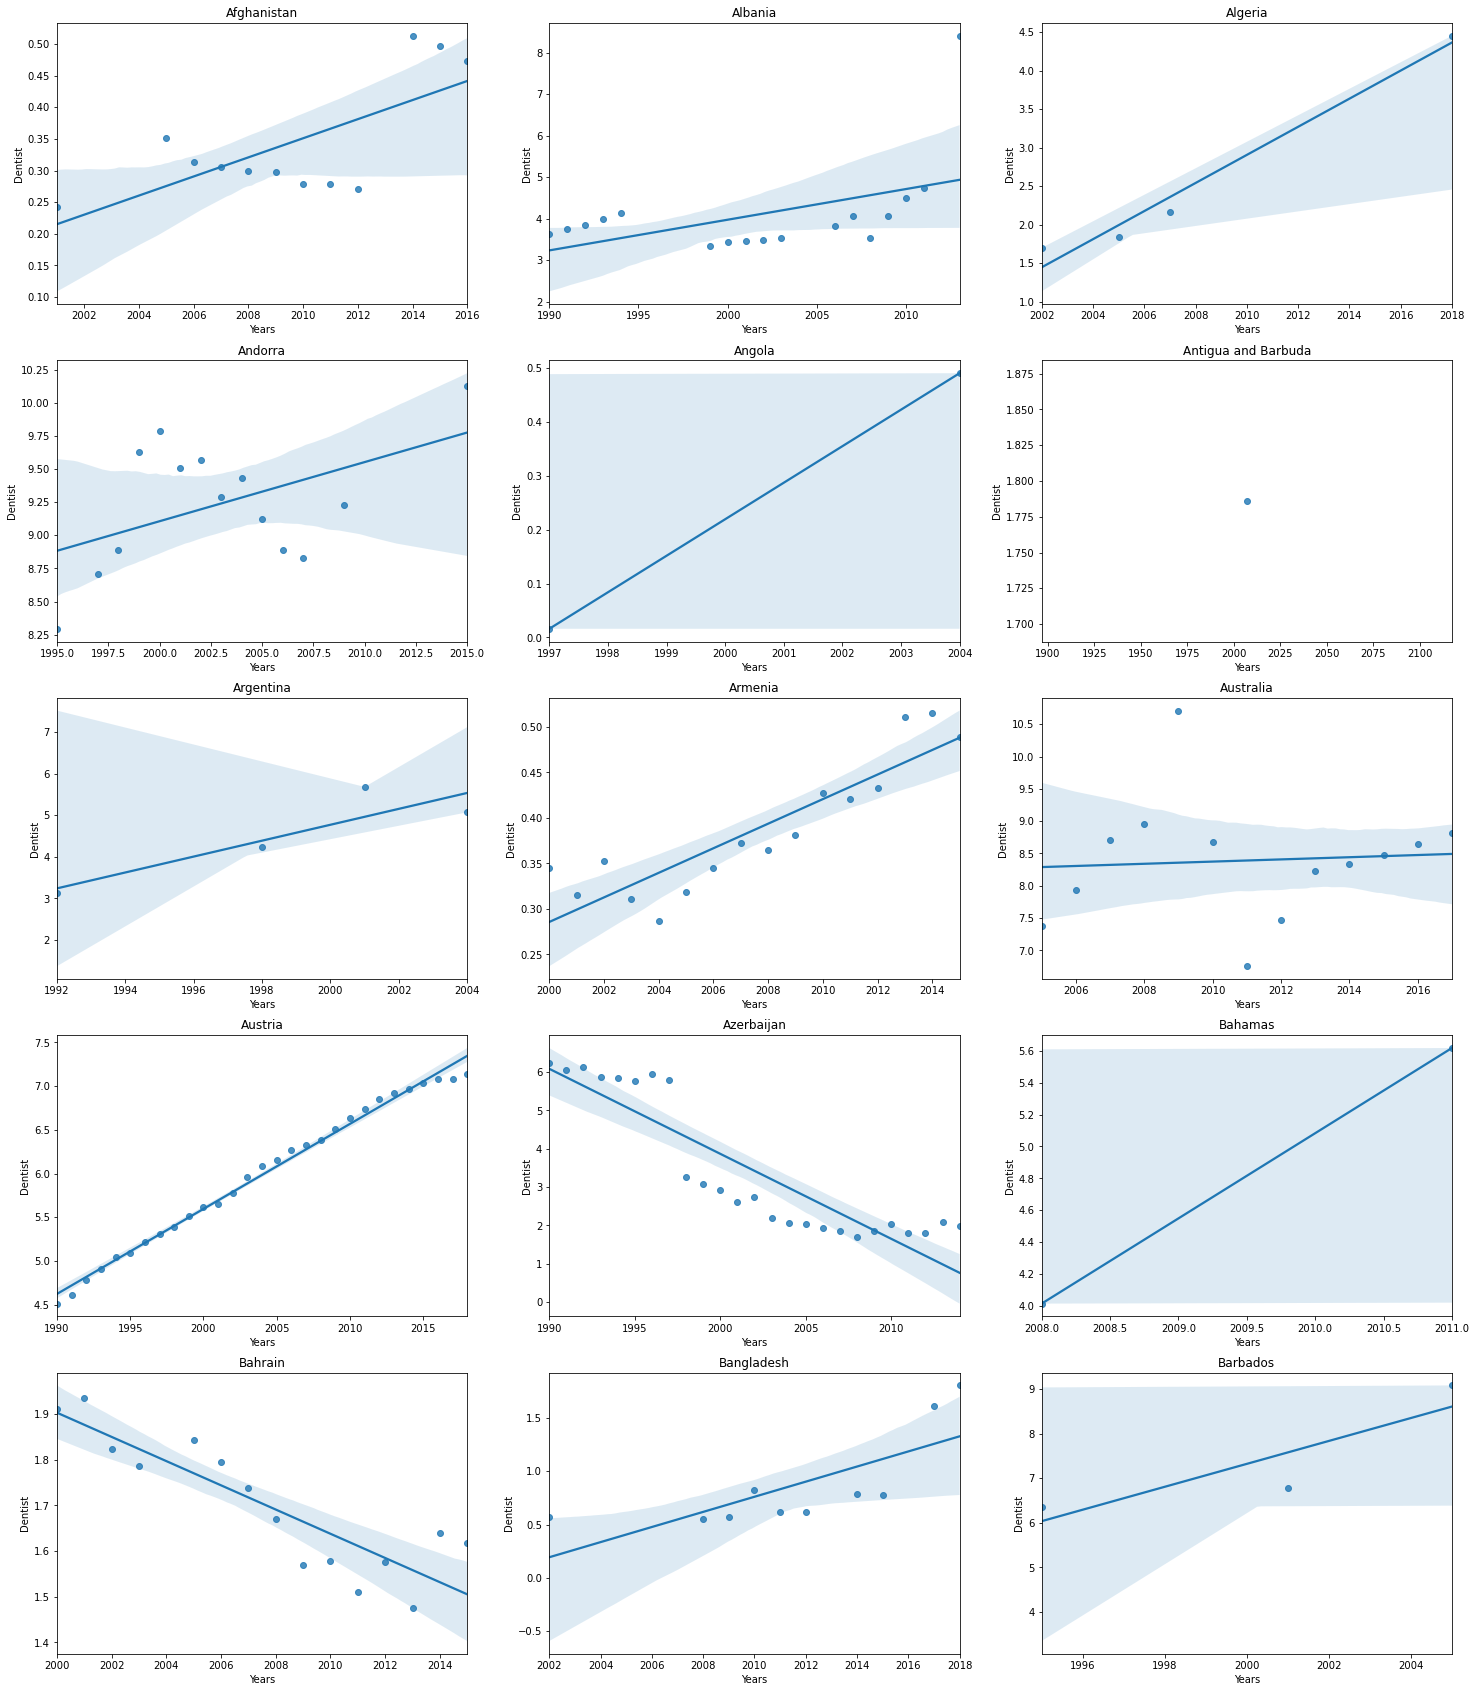

In [1236]:
fig, subaxes= plt.subplots(5,3, figsize=(25,30))

for ax, K in zip(subaxes.flatten(), [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]):
    sns.regplot(x=doctor_new.iloc[:,0:6][doctor_new.iloc[:,0:6]["Country"]==doctor_new["Country"].unique()[K]]["Year"], 
                y=doctor_new.iloc[:,0:6][doctor_new.iloc[:,0:6]["Country"]==doctor_new["Country"].unique()[K]][doctor_new.iloc[:,0:6][doctor_new.iloc[:,0:6]["Country"]==doctor_new["Country"].unique()[K]].columns[5]],
               ax=ax)
    ax.set_xlabel('Years')
    ax.set_ylabel("Dentist")
    ax.set_title(doctor_new["Country"].unique()[K])